In [13]:
import django, sys, os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from django.db.models import Count, Avg, Sum, F

sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')

os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
from tmv_app.models import *

run_id = 342


In [2]:
dtopics = DynamicTopicYear.objects.filter(
    run_id=run_id,
    PY__isnull=False
).values('topic__title','score','PY')

df = pd.DataFrame.from_dict(list(dtopics))
df.head()

,PY,score,topic__title
0,1991,0.008345,"{hydrogen, storag, reform}"
1,1992,0.006462,"{hydrogen, storag, reform}"
2,1993,0.055675,"{hydrogen, storag, reform}"
3,1994,0.136813,"{hydrogen, storag, reform}"
4,1995,0.060312,"{hydrogen, storag, reform}"


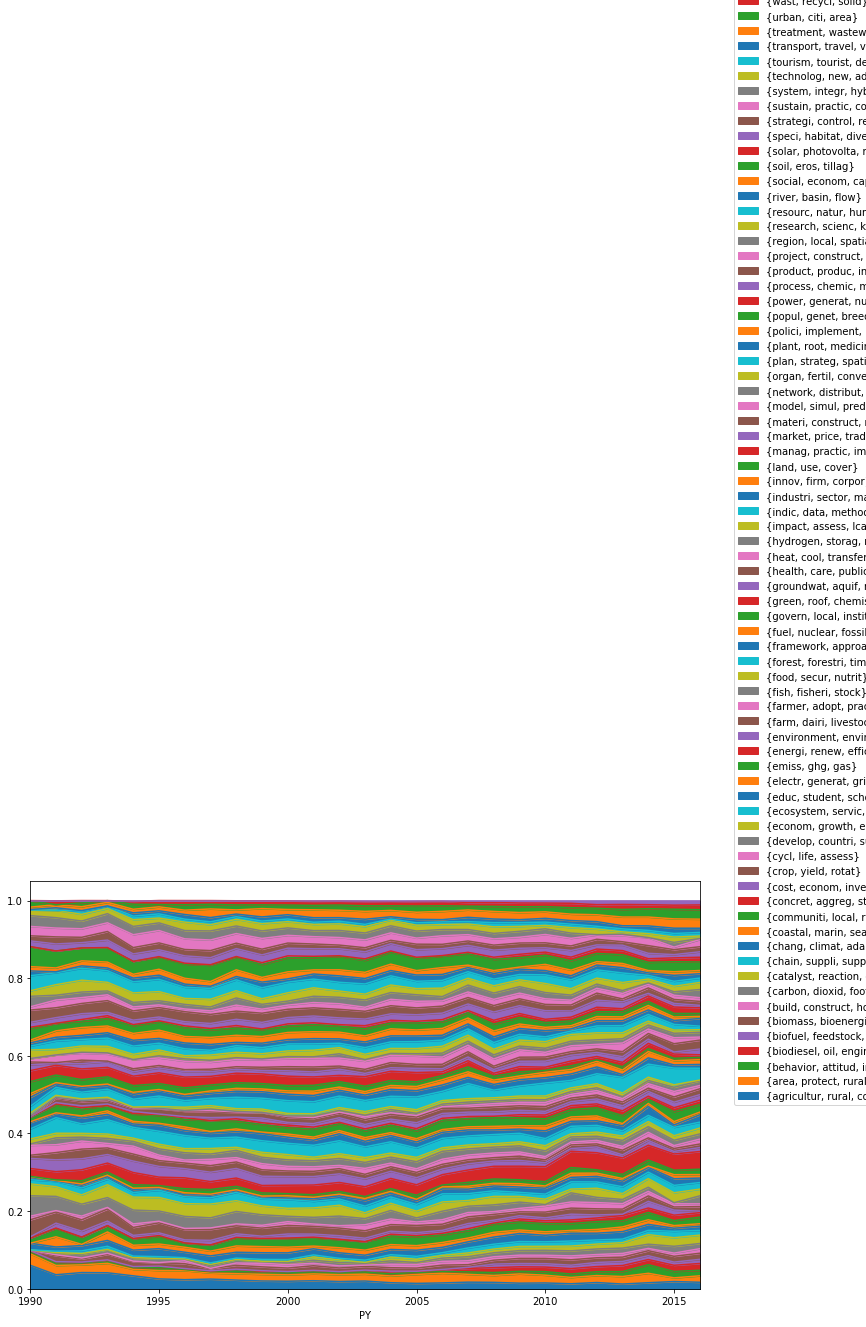

In [3]:
plt.rcParams["figure.figsize"] = [12,7.5]



pdf = df.set_index('PY').groupby('topic__title')

pdf = df.pivot(
    index='PY',
    columns='topic__title',
    values='score'
)

pdf = pdf.divide(pdf.sum(axis=1), axis=0)

fig, ax = plt.subplots()

pdf.plot(kind='area', stacked=True,ax=ax,legend=False)

handles, labels = ax.get_legend_handles_labels()
lpos = (0.85,2.5)


fig.legend(handles[::-1], labels[::-1], bbox_to_anchor=lpos, loc=2, borderaxespad=.0,)


plt.show()

In [4]:
df.head()

,PY,score,topic__title
0,1991,0.008345,"{hydrogen, storag, reform}"
1,1992,0.006462,"{hydrogen, storag, reform}"
2,1993,0.055675,"{hydrogen, storag, reform}"
3,1994,0.136813,"{hydrogen, storag, reform}"
4,1995,0.060312,"{hydrogen, storag, reform}"


In [14]:
dts = DynamicTopic.objects.filter(run_id=run_id).values()

ndf = pd.DataFrame.from_dict(list(dts)).sort_values('l5ys',ascending=False)

ndf.head()

,id,l1ys,l5ys,run_id_id,score,size,title,top_words
31,8025,0.368755,1.0,342,1031.970556,None,"{optim, problem, algorithm}","[optim, problem, algorithm, propos, solut, sol..."
90,8047,0.197860,1.0,342,578.261638,None,"{batteri, electrod, storag}","[batteri, electrod, storag, electrochem, capac..."
22,8092,1.000000,1.0,342,8.943561,None,"{region, local, studi}","[region, local, studi, spatial, geograph, anal..."
1,8068,0.238393,1.0,342,127.348065,None,"{sustain, practic, paper}","[sustain, practic, paper, univers, concept, to..."
113,8008,1.000000,1.0,342,121.673080,None,"{consum, purchas, behaviour}","[consum, purchas, behaviour, label, prefer, ch..."


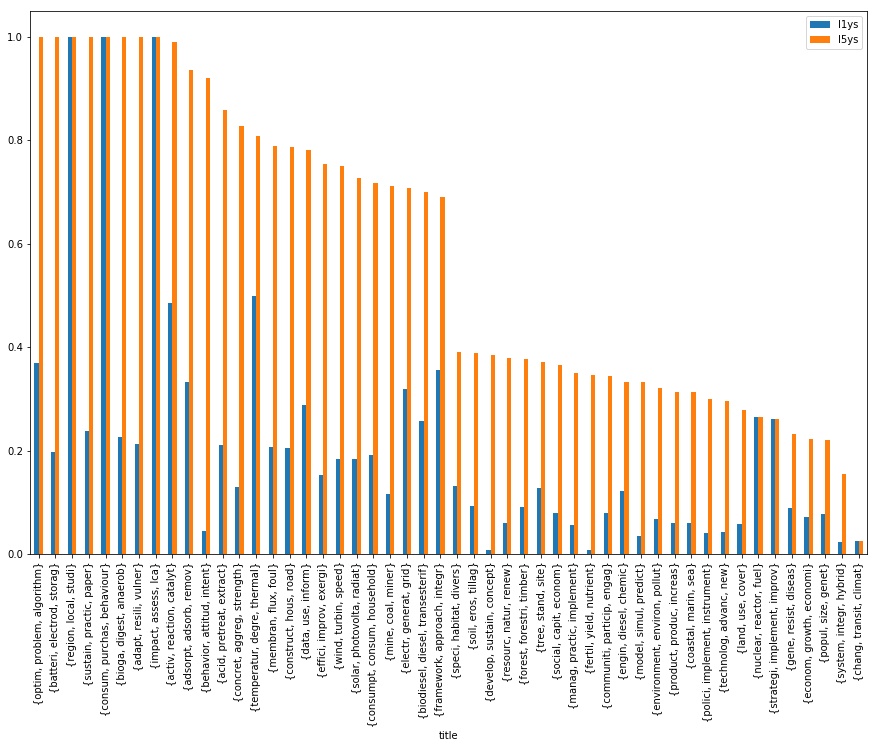

In [19]:
plt.rcParams["figure.figsize"] = [15,10]


pdf = ndf.sort_values('l5ys',ascending=False)

pdf = pd.concat([pdf.head(25),pdf.tail(25)])

pdf = pdf.set_index('title')[['l1ys','l5ys']].plot.bar()
plt.show()

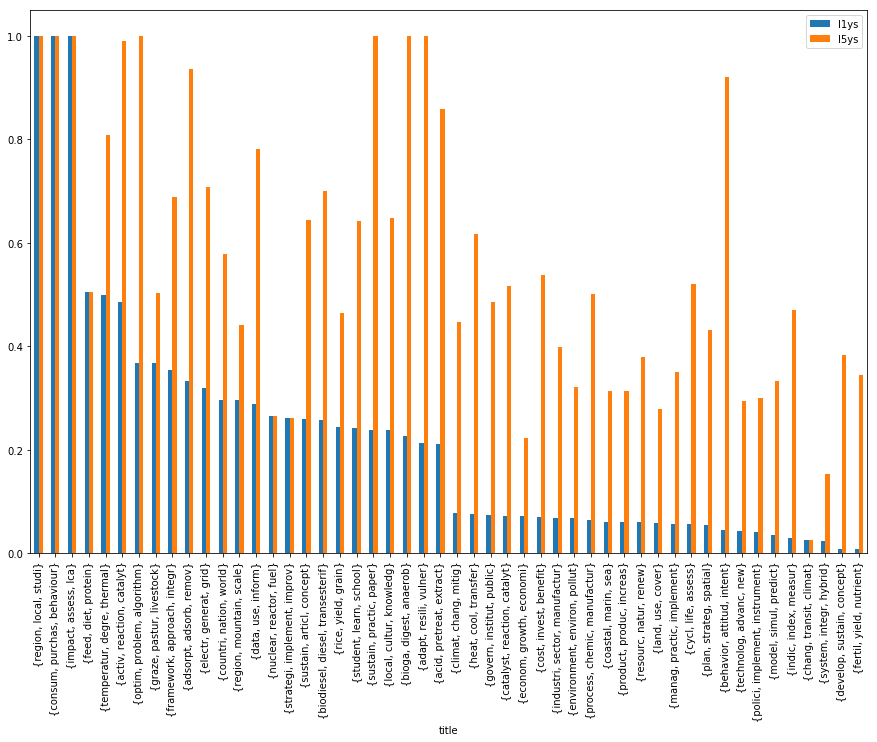

In [20]:
plt.rcParams["figure.figsize"] = [15,10]

pdf = ndf.sort_values('l1ys',ascending=False)

pdf = pd.concat([pdf.head(25),pdf.tail(25)]).set_index('title')[['l1ys','l5ys']].plot.bar()
plt.show()